In [1]:
# Library for numerical processing
import numpy as np
# Magic functions to allow jupyter display plots
%matplotlib inline
# Library for ploting similar to matlab
import matplotlib.pyplot as plt
# Library that useful for different manipulations with data
import pandas as pd

## Exercise 1
- load the dataset: `../data/international-airline-passengers.csv`
- inspect it using the `.info()` and `.head()` commands
- use the function `pd.to_datetime()` to change the column type of 'Month' to a datatime type
- set the index of df to be a datetime index using the column 'Month' and the `df.set_index()` method
- choose the appropriate plot and display the data
- choose appropriate scale
- label the axes

In [2]:
# - load the dataset: ../data/international-airline-passengers.csv
# Pandas is used to read content of csv file
df = pd.read_csv('../data/international-airline-passengers.csv')

In [4]:
# - inspect it using the .info() and .head() commands
# gives some information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                  144 non-null object
Thousand Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [8]:
# displays first n rows, by default n=5
# df.tail() is similar comand, but it shows 5 last rows
df.head()

,Month,Thousand Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
# - use the function to_datetime() to change the column type of 'Month' to a datatime type
# converts Sting object to Timestamp object, as can be seen below
print(type(df['Month'][0]))
df['Month'] = pd.to_datetime(df['Month'])
print(type(df['Month'][0]))

# - set the index of df to be a datetime index using the column 'Month' and tthe set_index() method
# month column is now used for indexing
df = df.set_index('Month')

<class 'str'>
<class 'pandas._libs.tslib.Timestamp'>


In [10]:
# displays first n rows, by default n=5
# df.tail() is similar comand, but it shows 5 last rows
df.head()

,Thousand Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


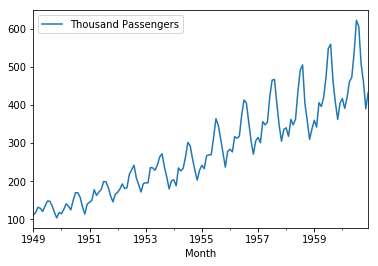

In [11]:
# - choose the appropriate plot and display the data
# - choose appropriate scale
# - label the axes
# plots Month vs number of passenger
# works properly because we have only one column, otherwise it is better to specify
df.plot()

## Exercise 2
- load the dataset: `../data/weight-height.csv`
- inspect it
- plot it using a scatter plot with Weight as a function of Height
- plot the male and female populations with 2 different colors on a new scatter plot
- remember to label the axes

In [12]:
# - load the dataset: ../data/weight-height.csv
# - inspect it
# similar to previous dataset, loads data from csv and displays first 5 rows
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [13]:
# gives some information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [14]:
# extracts some statistics
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [15]:
# counts the number of occurences of distinct values
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

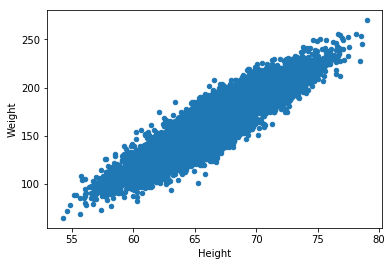

In [16]:
# - plot it using a scatter plot with Weight as a function of Height
_ = df.plot(kind='scatter', x='Height', y='Weight')

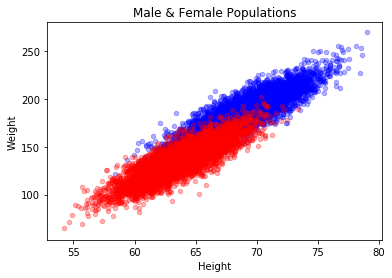

In [21]:
# - plot the male and female populations with 2 different colors on a new scatter plot
# - remember to label the axes

# this can be done in several ways, showing 2 here:
# select males and store it in separete dataframe
males = df[df['Gender'] == 'Male']
# select females and store it in separete dataframe
females = df.query('Gender == "Female"')
# Create a empty figure object and a set of subplots
fig, ax = plt.subplots()

# Fill figure with male and female subplots
males.plot(kind='scatter', x='Height', y='Weight',
           ax=ax, color='blue', alpha=0.3,
           title='Male & Female Populations')

females.plot(kind='scatter', x='Height', y='Weight',
             ax=ax, color='red', alpha=0.3)

In [26]:
# creates additional column that stores gender color
df['Gendercolor'] = df['Gender'].map({'Male': 'blue', 'Female': 'red'})
df.head()

,Gender,Height,Weight,Gendercolor
0,Male,73.847017,241.893563,blue
1,Male,68.781904,162.310473,blue
2,Male,74.110105,212.740856,blue
3,Male,71.730978,220.042470,blue
4,Male,69.881796,206.349801,blue


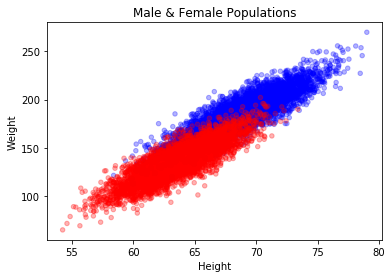

In [27]:
# directly creates plot as in example above, it uses newly created column to specify color directly
df.plot(kind='scatter', 
        x='Height',
        y='Weight',
        c=df['Gendercolor'],
        alpha=0.3,
        title='Male & Female Populations')

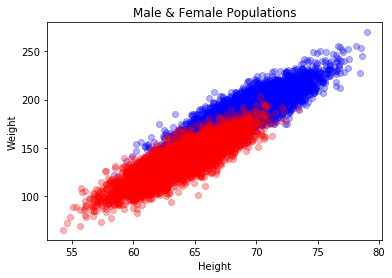

In [28]:
# yet another method to get same plots
fig, ax = plt.subplots()
ax.plot(males['Height'], males['Weight'], 'ob', 
        females['Height'], females['Weight'], 'or', alpha=0.3)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Male & Female Populations')

## Exercise 3
- plot the histogram of the heights for males and for females on the same plot
- use alpha to control transparency in the plot comand
- plot a vertical line at the mean of each population using `plt.axvline()`

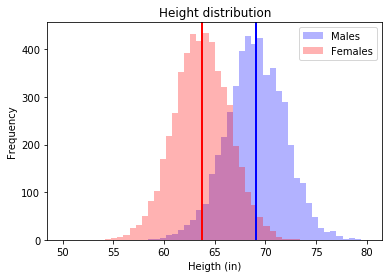

In [29]:
# creates histogram plot from dataframe
males['Height'].plot(kind='hist',
                     bins=50,
                     range=(50, 80),
                     alpha=0.3,
                     color='blue')
# creates histogram plot from dataframe
females['Height'].plot(kind='hist',
                       bins=50,
                       range=(50, 80),
                       alpha=0.3,
                       color='red')
# add title 
plt.title('Height distribution')
# add legend
plt.legend(["Males", "Females"])
# add x-axis label
plt.xlabel("Heigth (in)")

# creates two vertical lines that corresponds to mean
plt.axvline(males['Height'].mean(), color='blue', linewidth=2)
plt.axvline(females['Height'].mean(), color='red', linewidth=2)


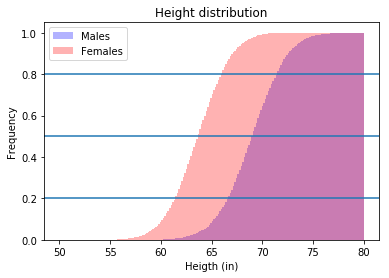

In [30]:
# creates cumalative distribution plots for males and females heights
males['Height'].plot(kind='hist',
                     bins=200,
                     range=(50, 80),
                     alpha=0.3,
                     color='blue',
                     cumulative=True,
                     normed=True)

females['Height'].plot(kind='hist',
                       bins=200,
                       range=(50, 80),
                       alpha=0.3,
                       color='red',
                       cumulative=True,
                       normed=True)
# add title 
plt.title('Height distribution')
# add legend
plt.legend(["Males", "Females"])
# add x-axis label
plt.xlabel("Heigth (in)")

# add horizontal lines
plt.axhline(0.8)
plt.axhline(0.5)
plt.axhline(0.2)

## Exercise 4
- plot the weights of the males and females using a box plot
- which one is easier to read?
- (remember to put in titles, axes and legends)

In [33]:
# creates new dataframe from previous, with weight as a values and genders as a columns
dfpvt = df.pivot(columns = 'Gender', values = 'Weight')

In [34]:
# every row corresponds to unuque sample point
dfpvt.head().append(dfpvt.tail())

Gender,Female,Male
0,NaN,241.893563
1,NaN,162.310473
2,NaN,212.740856
3,NaN,220.042470
4,NaN,206.349801
9995,136.777454,NaN
9996,170.867906,NaN
9997,128.475319,NaN
9998,163.852461,NaN
9999,113.649103,NaN


In [35]:
# provides info about corresponding dataframe
dfpvt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Female    5000 non-null float64
Male      5000 non-null float64
dtypes: float64(2)
memory usage: 234.4 KB


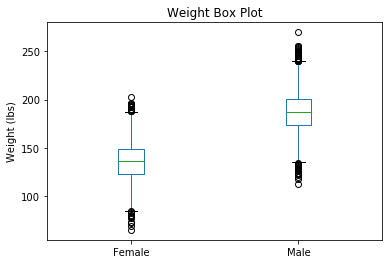

In [36]:
# creates box plot based on gender weight distribution
dfpvt.plot(kind='box')
# add title 
plt.title('Weight Box Plot')
# add y-axis label 
plt.ylabel("Weight (lbs)")

## Exercise 5
- load the dataset: `../data/titanic-train.csv`
- learn about scattermatrix here: http://pandas.pydata.org/pandas-docs/stable/visualization.html
- display the data using a scattermatrix

In [37]:
# read data from file
df = pd.read_csv('../data/titanic-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
# import scatter_matrix from pandas
from pandas.tools.plotting import scatter_matrix
# alternatevely we can use pd.tools.plotting.scatter_matrix, but above on e is more convinient

C:\Users\dima_\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


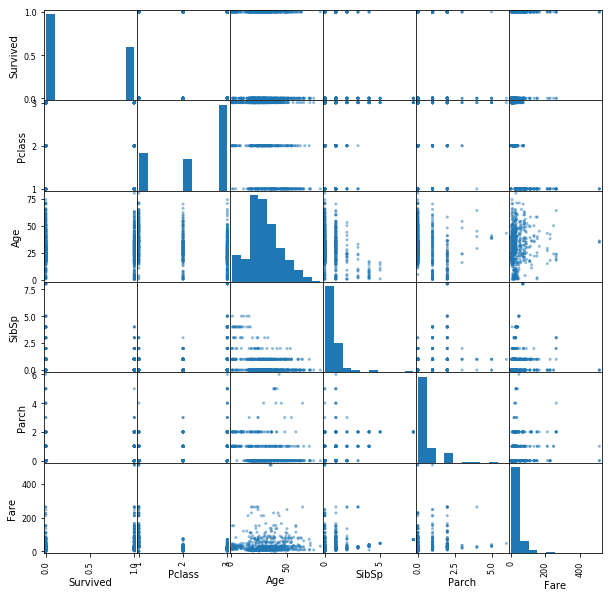

In [42]:
# draws matrix of scatter plots for every pair of parameters and arrenges subplots in matrix
# Diagonal entries are histogram
_ = scatter_matrix(df.drop('PassengerId', axis=1), figsize=(10, 10))